<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Сергей! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Прекод

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные лежат в папке `/datasets/image_search/` или доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

## Импорты и констансы

In [1]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 9.0/12.8 MB 6.5 MB/s eta 0:00:01m

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import os
import random as rd
from tqdm import tqdm
tqdm.pandas()


from math import ceil
from PIL import Image
from pathlib import Path


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy


import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as mdls


from sklearn.dummy import DummyRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from IPython.display import display

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
На мой взгляд привязка к локальному диску (или твоему личному гугл драйву) это не очень  удобно, т.к. у того, кто будет проверять твой проект свой диск и на нем нет датасета. Выходом может быть прямое закачивание датасета в сессию colab. Вот код для скачивания и извлечения данных из архива
    
    
    # загрузка датасета

    !wget -q https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip
    !unzip -q dsplus_integrated_project_4.zip

    DATA_PATH = '/content/to_upload'
    
-------
  
Но вот как раз для личных проектов использование свазки Colab + Google Drive это очень удобно. Тут вопросов конечно же нет.    
</div>

In [3]:
PATH = '/Users/vs/Programming/Data Science/Data-Science-Projects/18. new/df'
TRAIN_DATA_PATH = '/Users/vs/Programming/Data Science/Data-Science-Projects/18. new/df/train_images'
TEST_DATA_PATH = '/Users/vs/Programming/Data Science/Data-Science-Projects/18. new/df/test_images'
RANDOM_STATE = 42
CHILD_WORDS = ["children", "teenager", "baby", "child", "youth", "girl", "boy",
                "infant", "toddler", "youngster", "adolescent", "teen", "kid",
                "student", "pupil", "grandchild", "sister", "brother", "nephew",
                "niece", "daughter", "son"]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Большое тебе человеческое спасибо за вынос пути к данным в отдельную константу. Это сэкономило мне немало времени при проверке.

----
Но возможно было бы корректнее пути TRAIN_DATA_PATH и TEST_DATA_PATH собрать из PATH и дополнительных путей внутри папки.

</div>

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


In [4]:
train_data = pd.read_csv(os.path.join(PATH, 'train_dataset.csv'))
train_data.name = 'train_data'
data_crowd = pd.read_csv(os.path.join(PATH, 'CrowdAnnotations.tsv'), sep='\t', names = ['image', 'query_id', 'fraction', 'pros', 'cons'])
data_crowd.name = 'data_crowd'
data_expert = pd.read_csv(os.path.join(PATH, 'ExpertAnnotations.tsv'), sep='\t', names = ['image', 'query_id', 'first', 'second', 'third'])
data_expert.name = 'data_expert'
test_query = pd.read_csv(os.path.join(PATH, 'test_queries.csv'), index_col=[0], sep='|')
test_query.name = 'test_query'
test_image = pd.read_csv(os.path.join(PATH, 'test_images.csv'))
test_image.name = 'test_image'

In [5]:
for dataframe in [train_data, data_crowd, data_expert, test_query, test_image]:
    print('------------------------------------------------------------------------------------------------------------')
    print('+-------------+')
    print(f'| {dataframe.name}  |')
    print('+-------------+')
    display(dataframe.sample(5))
    print(dataframe.info())
    print()

------------------------------------------------------------------------------------------------------------
+-------------+
| train_data  |
+-------------+


,image,query_id,query_text
698,3074842262_62b1b2168c.jpg,2999730677_0cfa1c146e.jpg#2,Two puppies are playing in the leaves .
4870,2490768374_45d94fc658.jpg,3605676864_0fb491267e.jpg#2,Children play in an inflatable pool .
21,700884207_d3ec546494.jpg,2718495608_d8533e3ac5.jpg#2,A girl wearing a yellow shirt and sunglasses s...
5068,2522297487_57edf117f7.jpg,2675685200_0913d84d9b.jpg#2,a young boy making a big mess on the floor and...
1860,2460797929_66446c13db.jpg,3328646934_5cca4cebce.jpg#2,A blonde girl surfing down a sandy hill


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB
None

------------------------------------------------------------------------------------------------------------
+-------------+
| data_crowd  |
+-------------+


,image,query_id,fraction,pros,cons
16030,2654514044_a70a6e2c21.jpg,246055693_ccb69ac5c6.jpg#2,0.333333,1,2
30023,3280052365_c4644bf0a5.jpg,3449114979_6cdc3e8da8.jpg#2,0.000000,0,3
2439,1408958345_68eea9a4e4.jpg,1897025969_0c41688fa6.jpg#2,0.000000,0,3
43861,486917990_72bd4069af.jpg,415793623_6c1225ae27.jpg#2,0.666667,2,1
36841,3540416981_4e74f08cbb.jpg,2885387575_9127ea10f1.jpg#2,0.000000,0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     47830 non-null  object 
 1   query_id  47830 non-null  object 
 2   fraction  47830 non-null  float64
 3   pros      47830 non-null  int64  
 4   cons      47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB
None

------------------------------------------------------------------------------------------------------------
+-------------+
| data_expert  |
+-------------+


,image,query_id,first,second,third
3745,3315616181_15dd137e27.jpg,1765164972_92dac06fa9.jpg#2,1,2,2
4414,3523474077_16e14bc54c.jpg,2415803492_56a673dc25.jpg#2,1,1,2
1710,2543589122_ec3e55f434.jpg,3602838407_bf13e49243.jpg#2,3,3,3
4387,3514179514_cbc3371b92.jpg,132489044_3be606baf7.jpg#2,1,1,1
5509,533713007_bf9f3e25b4.jpg,1258913059_07c613f7ff.jpg#2,1,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   first     5822 non-null   int64 
 3   second    5822 non-null   int64 
 4   third     5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB
None

------------------------------------------------------------------------------------------------------------
+-------------+
| test_query  |
+-------------+


,query_id,query_text,image
191,2986716822_e220754d32.jpg#1,A dog carries a large stick in its mouth over ...,2986716822_e220754d32.jpg
328,3421547427_53411b6278.jpg#3,A tennis player wearing a blue shirt raises hi...,3421547427_53411b6278.jpg
36,1745110280_0cbff5e273.jpg#1,A caramel colored dog sits in front of trees l...,1745110280_0cbff5e273.jpg
193,2986716822_e220754d32.jpg#3,a large dog carrying a large stick in its mouth .,2986716822_e220754d32.jpg
429,381514859_b40418d9c3.jpg#4,Two white dogs chase after a red ball in a yar...,381514859_b40418d9c3.jpg


<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB
None

------------------------------------------------------------------------------------------------------------
+-------------+
| test_image  |
+-------------+


,image
52,2141713971_e25eb12712.jpg
40,3466891862_9afde75568.jpg
64,3163198309_bbfe504f0a.jpg
10,3555573680_41c1540a86.jpg
92,404850242_3a55a4c874.jpg


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes
None



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
    
Крайне важно посмотреть не только несколько строк каждого датфрейма, но и изнать сколько записей в каждом датафрейме.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Поправил 🙂

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

/var/folders/70/k39t_x2d08g08hls8fkylcyr0000gn/T/ipykernel_79200/3393550156.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/70/k39t_x2d08g08hls8fkylcyr0000gn/T/ipykernel_79200/3393550156.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


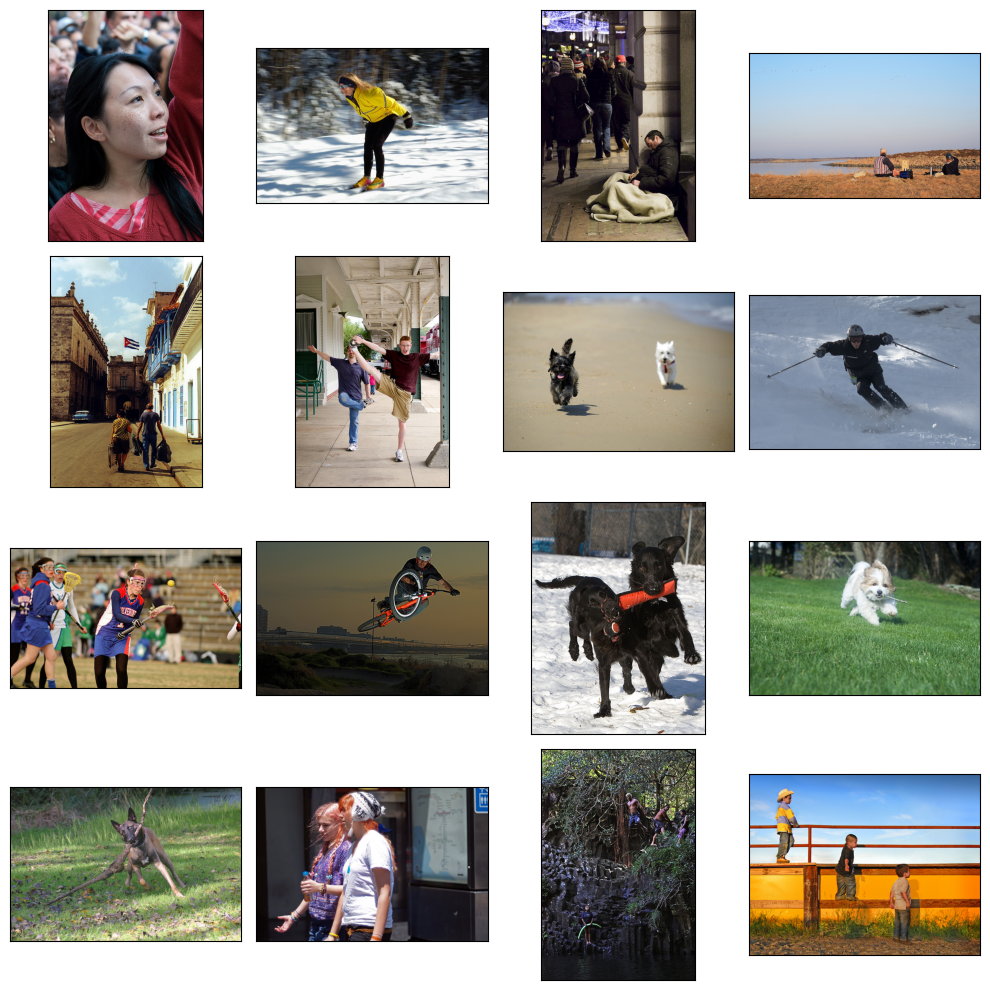

In [6]:
samples_train = list(train_data['image'].sample(8))
samples_test = list(test_query['image'].sample(8))

fig = plt.figure(figsize=(10,10))
for i in range(8):
    fig.add_subplot(4, 4, i+1)
    image = Image.open(Path(PATH, 'train_images', samples_train[i]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
for i in range(8):
    fig.add_subplot(4, 4, i+9)
    image = Image.open(Path(PATH, 'test_images', samples_test[i]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

del image

Имея в наличии экспертные и краудсорсинговые оценки соответствия текста и изображения, а также обучающий и тестовый датасеты, мы готовы к агрегации оценок. Процесс агрегации включает объединение оценок с использованием метода агрегации. Сначала мы нормализуем экспертные оценки от 1 до 4 до диапазона [0, 1]. Затем, для вычисления итоговой оценки, применяется взвешенное среднее между масштабированными оценками экспертов и долей краудсорсинга. Коэффициент для оценок экспертов составляет 0.6, в то время как для оценок краудсорсинга - 0.4. Это позволяет учесть как экспертные мнения, так и коллективное мнение группы людей при формировании окончательной оценки. Однако перед этим шагом мы удаляем все строки с отсутствующими данными.

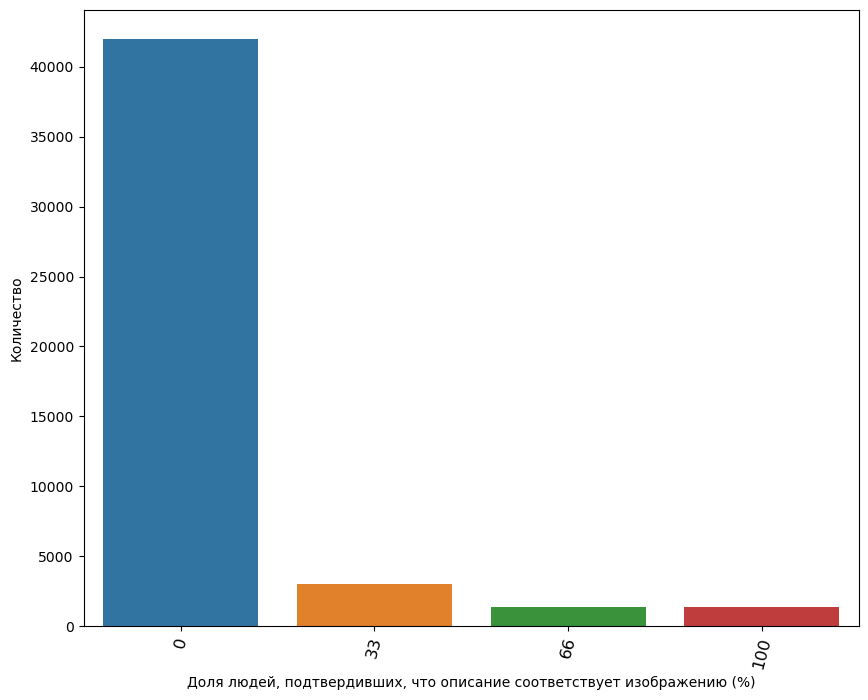

In [7]:
crowd_analicit = data_crowd.copy()
crowd_analicit['fraction'] *= 100
crowd_analicit['fraction'] = crowd_analicit['fraction'].astype('int')
crowd_array=[]
fraction_nums = np.array([0, 33, 66, 100])
for i in fraction_nums:
    crowd_array.append((crowd_analicit['fraction'] == i).sum())

plt.figure(figsize=(10, 8))
sns.barplot(x = fraction_nums, y = crowd_array)
plt.xticks(rotation=75, size=12)
plt.xlabel('Доля людей, подтвердивших, что описание соответствует изображению (%)')
plt.ylabel('Количество')
plt.show()

In [8]:
del crowd_analicit

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Мне кажется что знакомство с данными можно провести более интересно и сформировать значимые выводы. Попробую сформулировать вопросы, ответить на которые будет интересно:
  - Количество уникальных изображений в обучающем и тестовом наборах
  - Количество уникальных запросов  
  - Количество оценок в экспертном и краудсорсинговом наборах.

Ну и конечно интересно посмотреть на изображения и описания из датасета.ю    
    
Выводы о том, с какими данными мы продолжим работу.
    
    
------
    
Специально вернулся с середины ревь чтобы дополнить.  Ты недостаточно познакомился с данными, как следствие происходят достаточно досадные ошибки причина которых - недостаточное понимание данных.    
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Этот проект достаточно сложный. А справляться со сложностью (и для упрощения разработки и для упрощения понимания проекта) нам попогает раздеелние на более простые блоки.
    
Советую тебе разделить данный блок на две части.
    
 - Знакомство с данными и разведочный анализ. В этом разделе мы знакомимся с данными, формируем у себя и читателя "объемное" представление о том, что из себя представляет полученный датасет и как мы будем с ним работать.
 - Предобработка. На этом этапе мы из нескольких источников (датафреймов) собираем единый датафрейм признаки/таргет (в нашем случае изображение/описание+id - итоговая оценка).  Поэтому в конце раздела крайне важно показать результат (head/info)

    
</div>

### Предобработка

In [9]:
data_expert['expert'] = data_expert['first'] + data_expert['second'] + data_expert['third']

scaler = MinMaxScaler()
data_expert['expert'] = scaler.fit_transform(data_expert[['expert']])

data_expert.sample(5)

,image,query_id,first,second,third,expert
5732,801607443_f15956d1ce.jpg,3567061016_62768dcce1.jpg#2,1,1,1,0.000000
2555,2929506802_5432054d77.jpg,435827376_4384c3005a.jpg#2,1,1,1,0.000000
2078,2707873672_15e6b5d54b.jpg,3256275785_9c3af57576.jpg#2,1,1,1,0.000000
5804,968081289_cdba83ce2e.jpg,533979933_a95b03323b.jpg#2,1,2,2,0.222222
3287,3191135894_2b4bdabb6d.jpg,2909875716_25c8652614.jpg#2,1,2,2,0.222222


In [10]:
merged_annotations = data_expert.merge(data_crowd, left_on=['image', 'query_id'], right_on=['image', 'query_id'], how='outer')[['image', 'query_id', 'expert', 'fraction']]
def calc_res(row):
    if pd.isna(row['expert']) and pd.isna(row['fraction']):
        return np.nan
    elif pd.isna(row['expert']):
        return row['fraction']
    elif pd.isna(row['fraction']):
        return row['expert']
    else:
        return row['expert'] * 0.6 + row['fraction'] * 0.4

merged_annotations['result'] = merged_annotations.apply(calc_res, axis=1)
merged_annotations.sample(5)

del data_expert
del data_crowd

In [11]:
merged_annotations = merged_annotations[['image', 'query_id', 'result']]
merged_annotations.sample(5)

,image,query_id,result
40614,3530843182_35af2c821c.jpg,3411393875_a9ff73c67a.jpg#2,0.000000
31790,3211556865_d1d9becf69.jpg,3138399980_d6ab8b2272.jpg#2,0.333333
10719,1998457059_c9ac9a1e1a.jpg,2461616306_3ee7ac1b4b.jpg#2,0.000000
38866,3472364264_dbde5a8d0a.jpg,3310067561_b92017acab.jpg#2,0.000000
18205,2501595799_6316001e89.jpg,3602838407_bf13e49243.jpg#2,0.000000


In [12]:
merged_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51323 entries, 0 to 51322
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     51323 non-null  object 
 1   query_id  51323 non-null  object 
 2   result    51323 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [13]:
train_unique = train_data.drop_duplicates(subset=['query_id', 'query_text']).reset_index(drop=True)
train_unique.sample(5)

,image,query_id,query_text
508,2101457132_69c950bc45.jpg,3435035138_af32890a4c.jpg#2,A shaggy dog runs down a dirt trail in a lush ...
597,2229179070_dc8ea8582e.jpg,2657484284_daa07a3a1b.jpg#2,two conoes float down the river .
300,1433142189_cda8652603.jpg,461505235_590102a5bf.jpg#2,A person descends a rope from a cliff into the...
646,2308271254_27fb466eb4.jpg,2607462776_78e639d891.jpg#2,A black dog jumps into the water off a dock .
486,2077079696_03380d218b.jpg,3139876823_859c7d7c23.jpg#2,A skier about to go down the mountain .


In [14]:
train_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       977 non-null    object
 1   query_id    977 non-null    object
 2   query_text  977 non-null    object
dtypes: object(3)
memory usage: 23.0+ KB


In [15]:
train_data = merged_annotations.merge(train_unique, left_on=['query_id'], right_on=['query_id'], how='inner')

print(train_data.info())
train_data.sample(5)

del merged_annotations
del train_unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50214 entries, 0 to 50213
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_x     50214 non-null  object 
 1   query_id    50214 non-null  object 
 2   result      50214 non-null  float64
 3   image_y     50214 non-null  object 
 4   query_text  50214 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.9+ MB
None


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
Ключом для объединения в нашем случае может выступать только пара "изображение + описание".  Иначе мы начинаем получать ошибки.
    
-------------
    
Давай поймем, какую вообще проблемы ты пытаешся решить объединением.  У тебя есть датафрейм в котором есть оценки для 51323 пар изображение/описание. Насколько я понимаю "для счастья" тебе не хватает расшифровки описания. Но ведь у тебя есть query_id. Просто создай датафрейм с уникальными парами (query_id - query_text) (их должно получиться 977, по числу уникальных описаний) и приджойни описания по известному id.    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента V2</b></font>
   
Поправил 🙂

</div>

In [16]:
train_data = train_data.drop_duplicates().reset_index(drop=True)
train_data = train_data.drop(['image_y'], axis=1)
train_data.rename(columns = {'image_x':'image'}, inplace = True)
print(train_data.info())
train_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50214 entries, 0 to 50213
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       50214 non-null  object 
 1   query_id    50214 non-null  object 
 2   result      50214 non-null  float64
 3   query_text  50214 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB
None


,image,query_id,result,query_text
17428,2496370758_a3fbc49837.jpg,3375070563_3c290a7991.jpg#2,0.000000,A white birds lands swiftly in the water .
24894,2953015871_cae796b6e7.jpg,2860872588_f2c7b30e1a.jpg#2,0.000000,Two dogs are jumping up at each other .
41223,3521374954_37371b49a4.jpg,2339106348_2df90aa6a9.jpg#2,0.000000,The girls were in the crowd .
8624,3541474181_489f19fae7.jpg,3182121297_38c99b2769.jpg#2,0.866667,Person snowboarding at a ski slope .
21914,3285993030_87b0f1d202.jpg,2696866120_254a0345bc.jpg#2,0.000000,A dog rolls on the ground .


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Всю логику предобработки ты закинул в одну ячейку без каких-либо пояснений. Уверен что это крайне сложно как для понимания и ревь, так и для отладки.
      
    
Пожалуйста раздели эту ячейку на несколько с демонстрацией промежуточных результатов и пояснениями, что именно ты делаешь (ну или просто подбробно опиши в текстовом формате что именно ты делаешь и зачем)
    
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
   
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   
    
 - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
 - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.
    
 - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь
    
 - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....
    
-------
    
У тебя же получается какой-то странный коктейль.. Вначале ты соединил оценки через inner и получил чуть больше 2К оцененных пар....
    
Затем ты соединяешь train_data (а там те же самые записи, что и в экспертных оценках) и merged_annotations, но уже в качестве ключа исползьуешь только изображение (а не изображение + описание), в результате получается вообще непонятный "коктейль".
    
Пожалуйста пройдись по инструкции выплонения проекта, по шагам....
    
 1. Т.е. вначале предобрабатываем экспертные оценки, получаем итоговую.
 2. Соединяем экспертные и краудсорс оценки (если  выбираешь использовать краудсорс оценки)
 3. Если нужно - восстанавливаем тексты по известному id описания.
    
    


</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
    
Пожалуйста не забывай показывать промежуточные результаты предобработки. Без этого понять логику твоих действий читателю будет невозможно.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Поправил 🙂

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

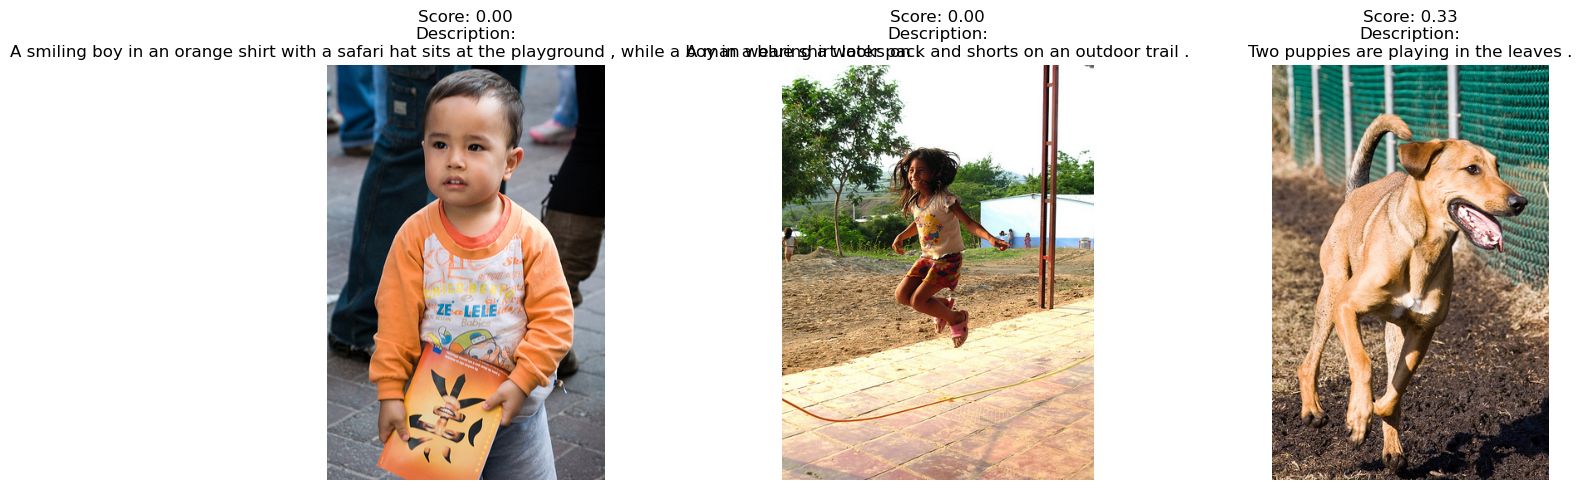

In [17]:
# Choosing random rows from merged annotations
random_rows = train_data.sample(3)

# Creating a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, row in enumerate(random_rows.itertuples()):
    # Getting the path to the image (replace 'train_path' with the path to your images)
    image_path = os.path.join(TRAIN_DATA_PATH, row.image)

    # Displaying the image on the corresponding subplot
    image = plt.imread(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

    # Displaying the description and merged score below the image
    axes[i].set_title(f"Score: {row.result:.2f}\nDescription:\n{row.query_text}")

plt.tight_layout()
plt.show()

del image

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
    
При перезапуске код сломался. Пожалуйста убери хардкод путей, используй пути собранные с помощью констант, которые ты определяешь в начале работы.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
    
Пожалуйста покажи ключевой результат предобработки - датафрейм с парами изображение/описание + оценки. Важно показать как несколько строк, так и общее количество данных полученном датафрейме.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Поправил 🙂

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

In [18]:
# Creating a dictionary for counting mentions
word_counts = {word: 0 for word in CHILD_WORDS}

# Counting mentions of each word in the descriptions
for description in train_data['query_text']:
    for word in CHILD_WORDS:
        if word in description.lower():
            word_counts[word] += 1

# Sorting words by the number of mentions in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Printing words and their counts
for word, count in sorted_word_counts:
    print(f"Word '{word}' appears {count} times")


Word 'girl' appears 5634 times
Word 'boy' appears 5140 times
Word 'child' appears 3071 times
Word 'son' appears 1763 times
Word 'children' appears 1300 times
Word 'kid' appears 592 times
Word 'baby' appears 415 times
Word 'toddler' appears 374 times
Word 'youth' appears 77 times
Word 'student' appears 54 times
Word 'teen' appears 37 times
Word 'teenager' appears 9 times
Word 'infant' appears 0 times
Word 'youngster' appears 0 times
Word 'adolescent' appears 0 times
Word 'pupil' appears 0 times
Word 'grandchild' appears 0 times
Word 'sister' appears 0 times
Word 'brother' appears 0 times
Word 'nephew' appears 0 times
Word 'niece' appears 0 times
Word 'daughter' appears 0 times


In [19]:
nlp = spacy.load("en_core_web_sm")

def lemma_clear(text):
    lemm = nlp(text)
    lemm = " ".join([token.lemma_ for token in lemm])


    return " ".join(lemm.split())


In [20]:
lemm_train = train_data['query_text'].apply(lemma_clear)
lemm_train.sample(5)

10801    a man in a brown sweater and a woman smile for...
22606         a dog reach to catch a ball with its mouth .
16744                         two people on a motorcycle .
29405              a man be dive into water near a shore .
2502     the football player wear a white helmet and or...
Name: query_text, dtype: object

In [21]:
lemm_test = test_query['query_text'].apply(lemma_clear)
lemm_test.head()

0    two blonde boy , one in a camouflage shirt and...
1          two boy be squirt water gun at each other .
2                  two boy spray each other with water
3     two child wear jean squirt water at each other .
4        two young boy be squirt water at each other .
Name: query_text, dtype: object

In [22]:
train_data['lem_text'] = lemm_train

In [23]:
def child_text(text):
    for s in CHILD_WORDS:
        if text.find(s) > -1:
            return False
    return True

In [24]:
train_data['without_child'] = lemm_train.apply(child_text)
train_data.head()

,image,query_id,result,query_text,lem_text,without_child
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,A young child is wearing blue goggles and sitt...,a young child be wear blue goggle and sit in a...,False
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,A young child is wearing blue goggles and sitt...,a young child be wear blue goggle and sit in a...,False
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,0.133333,A young child is wearing blue goggles and sitt...,a young child be wear blue goggle and sit in a...,False
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,1.000000,A young child is wearing blue goggles and sitt...,a young child be wear blue goggle and sit in a...,False
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,A young child is wearing blue goggles and sitt...,a young child be wear blue goggle and sit in a...,False


In [25]:
def spl(text):
    return text[:text.find('#')]

In [26]:
num_forb_images = len(train_data[train_data['without_child']==False]['query_id'].apply(spl).unique())

In [27]:
num_forb_images

337

In [28]:
train_data = train_data[train_data['without_child'] != False].reset_index(drop=True)

In [29]:
train_data.head()

,image,query_id,result,query_text,lem_text,without_child
0,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.111111,A man sleeps under a blanket on a city street .,a man sleep under a blanket on a city street .,True
1,3187395715_f2940c2b72.jpg,3181701312_70a379ab6e.jpg#2,0.222222,A man sleeps under a blanket on a city street .,a man sleep under a blanket on a city street .,True
2,463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,0.200000,A man sleeps under a blanket on a city street .,a man sleep under a blanket on a city street .,True
3,488590040_35a3e96c89.jpg,3181701312_70a379ab6e.jpg#2,0.222222,A man sleeps under a blanket on a city street .,a man sleep under a blanket on a city street .,True
4,534875358_6ea30d3091.jpg,3181701312_70a379ab6e.jpg#2,0.111111,A man sleeps under a blanket on a city street .,a man sleep under a blanket on a city street .,True


In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34049 entries, 0 to 34048
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   image          34049 non-null  object 
 1   query_id       34049 non-null  object 
 2   result         34049 non-null  float64
 3   query_text     34049 non-null  object 
 4   lem_text       34049 non-null  object 
 5   without_child  34049 non-null  bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 1.3+ MB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удалил комментарии, в которых были запрещенные слова. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    

И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста покажи датафрейм, который получился после чистки. И важно показать не только несколько строк, но и размерность этого датафрейма, чтобы мы понимали, какой частью данных мы пожертвовали. </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Поправил 🙂

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

В ходе анализа обнаружено, что на многих изображениях присутствуют дети. Однако не наблюдается прямой связи между оценками и качеством изображений. Например, некоторые изображения, получившие оценку 0, все равно содержат детей. Также на изображениях встречаются животные, включая собак (с фразами "хороший мальчик", "хорошая девочка"). Хотя для решения данной задачи было бы полезно обучить модель компьютерного зрения, данные в нашем распоряжении несколько отличаются. Поэтому предлагается просто удалить все изображения, содержащие хотя бы одно из слов из заданного списка. Хотя это может привести к удалению части изображений с животными, это предпочтительнее, чем сохранение изображений с детьми.

## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

In [31]:
# Loading the pretrained ResNet-18 model
model = mdls.resnet18(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])
model = model.eval()

# Image preprocessing before feeding into the model
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function for vectorizing an image
def vectorize_image(image_path, model, preprocess):
    image = Image.open(image_path)
    image = preprocess(image)
    image = image.unsqueeze(0)

    with torch.no_grad():
        features = model(image)

    return features.numpy().squeeze()

# Iterating through all rows in train_data and vectorizing images
image_vectors = []

for image_name in train_data['image']:
    image_path = os.path.join(TRAIN_DATA_PATH, image_name)
    if os.path.exists(image_path):
        vectorized_image = vectorize_image(image_path, model, preprocess)
        image_vectors.append(vectorized_image)
    else:
        print(f"File not found: {image_path}")

# Converting vectors to a numpy array
if len(image_vectors) > 0:
    image_vectors = np.vstack(image_vectors)
else:
    print("No image vectors found.")

# Now you should have an array image_vectors with vectorized images.
# You can use it for combining with vectorized text and training your model.


/Users/vs/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [32]:
image_vectors.shape

(34049, 512)

Мы применили предварительно обученную модель ResNet-18 для векторизации изображений. Это позволило нам получить массив размером (8744, 1000).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Смотри, в начале раздела ты пишешь "исключить полносвязные слои, которые отвечают за конечное предсказание." Но по факту ты их не исключаешь и получаешь на выходе вектор размерностью 1000 (количество классов).

Поэтому давай либо обоснуем использование модели без отрезанных последних слоев, либо честно их отрежем.

Подскажу - отрезать нужно один последний слой, в этом случае размерность вектора признаков должна получиться 512
   
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Поправил 🙂

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


In [33]:
# Creating an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Vectorizing text from the 'query_text' column and obtaining the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['query_text'])

# Converting the matrix to a NumPy array
text_vectors = tfidf_matrix.toarray()

# Printing the dimensionality of the vectors
print("Dimensionality of text vectors:", text_vectors.shape)

Dimensionality of text vectors: (34049, 1000)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас ты сделал вектора с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.</div>

В данном участке кода мы использовали модель Word2Vec для векторизации текстовых описаний фотографий. Сначала мы провели токенизацию текстов и обучили модель Word2Vec. Затем создали функцию для векторизации каждого описания путем усреднения векторов слов. В случае отсутствия слова в модели, мы использовали нулевой вектор. В итоге получили массив векторов размером (8744, 925).

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [34]:
features = pd.DataFrame(np.hstack((image_vectors, text_vectors)), columns=[f"image_vector_{i}" for i in range(image_vectors.shape[1])] + [f"text_vector_{i}" for i in range(text_vectors.shape[1])])

target = np.array(train_data['result'])

In [35]:
features.shape

(34049, 1512)

In [36]:
target.shape

(34049,)

На данном этапе мы успешно объединили векторы изображений и текстовых описаний для подготовки данных к обучению. Мы создали матрицу, в которой каждой фотографии соответствует усредненный вектор её текстовых описаний. Это позволит нам в дальнейшем использовать объединенные данные для обучения модели, учитывая и визуальные, и текстовые характеристики изображений.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора признаков полученных из изображений и из тестов объеденены в один датасет</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Здесь напрашивается небольшой вывод, хотя бы с указанием размерностей полученных признаков.  
</div>

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

В качестве метрики мы выберем RMSE (корень из среднеквадратичной ошибки), так как она симметрична относительно знака ошибки и чувствительна к большим отклонениям.

Для разделения данных на тренировочную и валидационную выборки мы воспользуемся методом GroupShuffleSplit. Мы оставим только числовые признаки, а целевой признак будет находиться в таблице target.

In [37]:
groups = train_data['image']

gss = GroupShuffleSplit(n_splits=1, train_size=.6, random_state=RANDOM_STATE)
train_indices, test_indices = next(gss.split(X=features, y=target, groups=groups))

features_train, features_valid = features.loc[train_indices], features.loc[test_indices]
target_train, target_valid = target[train_indices], target[test_indices]

In [38]:
del features
del target
del train_data
del train_indices
del test_indices

In [39]:
print(features_train.shape, features_valid.shape, target_train.shape, target_valid.shape)

(20217, 1512) (13832, 1512) (20217,) (13832,)


In [40]:
print('Максимальное значение в features_train', features_train.max())
print('Минимальное значение в features_train', features_train.min())
print('Среднее значение в features_train', features_train.mean())
print('Стандартное отклонение значение в features_train', features_train.std())

Максимальное значение в features_train image_vector_0     3.901977
image_vector_1     5.567808
image_vector_2     3.615132
image_vector_3     5.112391
image_vector_4     4.593683
                     ...   
text_vector_995    0.699719
text_vector_996    0.621651
text_vector_997    0.455427
text_vector_998    0.429845
text_vector_999    0.457852
Length: 1512, dtype: float64
Минимальное значение в features_train image_vector_0     0.0
image_vector_1     0.0
image_vector_2     0.0
image_vector_3     0.0
image_vector_4     0.0
                  ... 
text_vector_995    0.0
text_vector_996    0.0
text_vector_997    0.0
text_vector_998    0.0
text_vector_999    0.0
Length: 1512, dtype: float64
Среднее значение в features_train image_vector_0     0.662907
image_vector_1     1.009001
image_vector_2     0.836420
image_vector_3     0.758310
image_vector_4     0.881443
                     ...   
text_vector_995    0.002457
text_vector_996    0.000799
text_vector_997    0.007543
text_vector_998   

In [41]:
print('Максимальное значение в features_test', features_valid.max())
print('Минимальное значение в features_test', features_valid.min())
print('Среднее значение в features_test', features_valid.mean())
print('Стандартное отклонение значение в features_test', features_valid.std())

Максимальное значение в features_test image_vector_0     4.502464
image_vector_1     7.634465
image_vector_2     4.073663
image_vector_3     4.955528
image_vector_4     3.213030
                     ...   
text_vector_995    0.699719
text_vector_996    0.621651
text_vector_997    0.455427
text_vector_998    0.429845
text_vector_999    0.457852
Length: 1512, dtype: float64
Минимальное значение в features_test image_vector_0     0.000000
image_vector_1     0.001402
image_vector_2     0.003799
image_vector_3     0.000000
image_vector_4     0.000000
                     ...   
text_vector_995    0.000000
text_vector_996    0.000000
text_vector_997    0.000000
text_vector_998    0.000000
text_vector_999    0.000000
Length: 1512, dtype: float64
Среднее значение в features_test image_vector_0     0.676586
image_vector_1     1.143430
image_vector_2     0.936097
image_vector_3     0.764093
image_vector_4     0.771212
                     ...   
text_vector_995    0.002732
text_vector_996    0.0

In [42]:
scaler = StandardScaler(with_mean=False)
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Пожаулуйста выбери метрику и обоснуй свой выбор.  </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Поправил 🙂

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

### Dummy Regressor

In [43]:
dummy_model = DummyRegressor(strategy='median')
dummy_model.fit(features_train, target_train)

DummyRegressor(strategy='median')

In [44]:
print("RMSE Dummy Regressor:", mean_squared_error(target_valid, dummy_model.predict(features_valid), squared=False))

RMSE Dummy Regressor: 0.22847727666894785


### Linear Regressor l1/l2

In [45]:
l1 = linear_model.Lasso(alpha=0.1)
l1.fit(features_train, target_train)

Lasso(alpha=0.1)

In [46]:
print("RMSE Lasso Regression:", mean_squared_error(target_valid, l1.predict(features_valid), squared=False))

RMSE Lasso Regression: 0.2132833787974751


In [47]:
l2 = linear_model.Ridge(alpha=0.1)
l2.fit(features_train, target_train)

Ridge(alpha=0.1)

In [48]:
print("RMSE Ridge Regression:", mean_squared_error(target_valid, l2.predict(features_valid), squared=False))

RMSE Ridge Regression: 0.23567477401145498


In [49]:
features_train = torch.FloatTensor(np.array(features_train))
features_valid = torch.FloatTensor(np.array(features_valid))
target_train = torch.FloatTensor(np.array(target_train))
target_valid = torch.FloatTensor(np.array(target_valid))

In [50]:
features_train.shape

torch.Size([20217, 1512])

In [51]:
class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3,
                 n_hidden_neurons_4, n_hidden_neurons_5, n_out_neurons):
            super(Net, self).__init__()

            self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
            self.act1 = nn.ReLU()
            self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
            self.act2 = nn.ReLU()
            self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
            self.act3 = nn.ReLU()
            self.fc4 = nn.Linear(n_hidden_neurons_3, n_hidden_neurons_4)
            self.act4 = nn.ReLU()
            self.fc5 = nn.Linear(n_hidden_neurons_4, n_hidden_neurons_5)
            self.act5 = nn.ReLU()
            self.fc6 = nn.Linear(n_hidden_neurons_5, n_out_neurons)
            self.act6 = nn.Sigmoid()

            nn.init.kaiming_uniform_(self.fc1.weight, mode='fan_in', nonlinearity='relu')
            nn.init.kaiming_uniform_(self.fc2.weight, mode='fan_in', nonlinearity='relu')
            nn.init.kaiming_uniform_(self.fc3.weight, mode='fan_in', nonlinearity='relu')
            nn.init.kaiming_uniform_(self.fc4.weight, mode='fan_in', nonlinearity='relu')
            nn.init.kaiming_uniform_(self.fc5.weight, mode='fan_in', nonlinearity='relu')
            nn.init.kaiming_uniform_(self.fc6.weight, mode='fan_in', nonlinearity='sigmoid')

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.act4(x)
        x = self.fc5(x)
        x = self.act5(x)
        x = self.fc6(x)
        x = self.act6(x)

        return x

In [52]:
n_in_neurons = features_train.shape[1]
n_hidden_neurons_1 = 512
n_hidden_neurons_2 = 256
n_hidden_neurons_3 = 128
n_hidden_neurons_4 = 64
n_hidden_neurons_5 = 32
n_out_neurons = 1

net = Net(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3,
          n_hidden_neurons_4, n_hidden_neurons_5, n_out_neurons)

optimizer2 = torch.optim.SGD(net.parameters(), lr=1e-4, momentum=0.8)

optimizers = [optimizer2]

loss = nn.MSELoss()

In [53]:
num_epochs = 1000
batch_size = 150
num_batches = ceil(len(features_train)/batch_size)

best_rmse = float('inf')  # Инициализация лучшей RMSE

for optimizer in optimizers:
    optimizer_rmse = []
    print(f'Оптимизатор {optimizer}:')
    for epoch in range(num_epochs):
        net.train()
        order = np.random.permutation(len(features_train))
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size
            optimizer.zero_grad()
            batch_indexes = order[start_index : start_index + batch_size]
            X_batch = features_train[batch_indexes]
            y_batch = target_train[batch_indexes]
            preds = net.forward(X_batch.float()).flatten()
            loss_value = loss(preds, y_batch)
            loss_value.backward()
            optimizer.step()

        # Проверка RMSE на валидационном наборе
        with torch.no_grad():
            net.eval()
            valid_preds = net.forward(features_valid).flatten()
            rmse = round(float(torch.sqrt(loss(valid_preds, target_valid))), 3)

            # Если текущая модель лучше предыдущей лучшей модели, сохраняем ее
            if rmse < best_rmse:
                best_rmse = rmse
                torch.save(net.state_dict(), 'best_model.pth')

            # Выводим результаты на каждой десятой итерации или на последней итерации
            if epoch % 10 == 0 or epoch == num_epochs - 1:
                print(f'RMSE на {epoch} итерации =', rmse)
                optimizer_rmse.append(rmse)

    print()
    print(f'Лучшая RMSE = {min(optimizer_rmse)} обнаружена на {optimizer_rmse.index(min(optimizer_rmse))} эпохе')
    print(f'Средняя RMSE = {round(np.mean(optimizer_rmse), 3)}')
    print('_' * 75, '\n')

Оптимизатор SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.0001
    maximize: False
    momentum: 0.8
    nesterov: False
    weight_decay: 0
):
RMSE на 0 итерации = 0.235
RMSE на 10 итерации = 0.217
RMSE на 20 итерации = 0.216
RMSE на 30 итерации = 0.216
RMSE на 40 итерации = 0.216
RMSE на 50 итерации = 0.215
RMSE на 60 итерации = 0.215
RMSE на 70 итерации = 0.215
RMSE на 80 итерации = 0.215
RMSE на 90 итерации = 0.215
RMSE на 100 итерации = 0.214
RMSE на 110 итерации = 0.214
RMSE на 120 итерации = 0.214
RMSE на 130 итерации = 0.214
RMSE на 140 итерации = 0.214
RMSE на 150 итерации = 0.214
RMSE на 160 итерации = 0.214
RMSE на 170 итерации = 0.213
RMSE на 180 итерации = 0.213
RMSE на 190 итерации = 0.213
RMSE на 200 итерации = 0.213
RMSE на 210 итерации = 0.213
RMSE на 220 итерации = 0.213
RMSE на 230 итерации = 0.213
RMSE на 240 итерации = 0.213
RMSE на 250 итерации = 0.213
RMSE на 260 итерации = 0.212
RMSE на 270 итерации = 0.212
RMSE н

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мне кажется ты движешься совсем не в том направлении.
    
Цель проекта - применение нейронных сетей к достаточно сложным признакам.  И даже линейная регрессия в нашем случае идет как подобие бейзлайна.
    
Но ты начинаешь исследовать и другие модели. ОК, если это не во вред, но это явно идет в ущерб нейронной сети. По нейронке ты просто взял рандомную архитектуру (и параметры обучения) и просто решил посмотреть на результат.
    
Но в случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилил архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
        
------
    
сейчас твоя нейронка показала низкое качесто. В чем причина?  Мало слоев и нейронов в каждом слое? Плохой lr? Мало эпох? Модель переобучена или недообучена? Мы этого просто не знаем, мы знаем только конечную метрику.
    
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В этом раздеел есть еще одна проблема  и заключается она в следующем. Для векторизации изображений ты использовал  Pytorch.  А модель для предсказания метрики строишь с помощью  Keras.  Поддержка двух DL фреймворков - это будет ад для девопса. Поэтому хорошей практикой является использование одного фреймворка в одном проекте. </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В начале проекта ты подробно расписал пользу GroupShuffleSplit.  Тогда используя кросс-валидацию нужно тоже использовать подобное разбиение, иначе одно и то же изображение может попасть в обе выборки (обучающую и валидацонную).

-------
    
Нельзя сравнивать метрику на кросс-валидации и метрику на валидационной (тестовой) выборке. Чтобы мы могли сравнить результаты новой моделис предыдущими моделями пожалуйста сделай оценку на той же выборке, что ты оценивал остальыне модели.    


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Поправил 🙂

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
Но ты удалил попытки оценить модель на линейной модели, оставив только нейронную сеть. Пожалуйста начни оценку с линейной регрессии (лучше использовать модель с l1/l2 регуляризацией)
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning"><b>v2</b>  
    
    
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. По ощущениям, метрика 0,3 у нейронки это сильно много.  Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента V2</b></font>
   
Поправил 🙂

</div>

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

test_query['lem_text'] = lemm_test
test_query['without_child'] = lemm_test.apply(child_text)
test_query.head()

test_query = test_query[test_query['without_child'] != False].reset_index(drop=True)
test_query.sample(5)

In [111]:
test_image_vectors = []

for image_name in test_query['image']:
    image_path = os.path.join(TEST_DATA_PATH, image_name)
    if os.path.exists(image_path):
        vectorized_image = vectorize_image(image_path, model, preprocess)
        test_image_vectors.append(vectorized_image)
    else:
        print(f"File not found: {image_path}")

# Converting vectors to a numpy array
if len(test_image_vectors) > 0:
    test_image_vectors = np.vstack(test_image_vectors)
else:
    print("No image vectors found.")

test_image_vectors.shape

(500, 512)

In [55]:
def ten_texts():
    texts = []
    for i in range(0,10):
        texts.append(test_query.iloc[rd.randint(0, 499)]['query_text'])
    return texts

test_tfidf_matrix = tfidf_vectorizer.transform(test_query['query_text'])

test_text_vectors = test_tfidf_matrix.toarray()

print("Dimensionality of text vectors:", test_text_vectors.shape)

test_features = pd.DataFrame(np.hstack((test_image_vectors, test_text_vectors)), columns=[f"image_vector_{i}" for i in range(test_image_vectors.shape[1])] + [f"text_vector_{i}" for i in range(test_text_vectors.shape[1])])
test_features = torch.FloatTensor(np.array(test_features))
test_features.shape

net.load_state_dict(torch.load('best_model.pth'))
result = net.forward(torch.FloatTensor(test_features)).flatten().detach().numpy()
print(result)

sorted_indices = np.argsort(result)[::-1]
top_10_indices = sorted_indices[:10]

print(top_10_indices)

In [56]:
def show(img, title=None):
    plt.figure(figsize=(3,3))
    plt.imshow(img)

    if title is not None:
        plt.title(title)

    plt.axis('off')

for i in top_10_indices:
    try:
        image_path = test_query.iloc[i]['image']
        img = Image.open(os.path.join(TEST_DATA_PATH, image_path))
        show(img, title=(test_query.iloc[i]['query_text'] + ' ' + str(result[i])))
    except:
        print('Этот контент запрещен')

In [117]:
def get_image_from_text(text):
    try:
        lemm_text = lemma_clear(text)
        # print('lemm_text', lemm_text)
        without_child = child_text(lemm_text)
        # print('without_child', without_child)
        if without_child == True:
            test_tfidf_matrix = tfidf_vectorizer.transform([lemm_text])
            # print('test_tfidf_matrix', test_tfidf_matrix)
            test_text_vectors = test_tfidf_matrix.toarray()
            test_text_vectors = np.tile(test_text_vectors, (len(test_image_vectors), 1))
            # print('test_text_vectors', test_text_vectors.shape)
            test_features = pd.DataFrame(np.hstack((test_image_vectors, test_text_vectors)), columns=[f"image_vector_{i}" for i in range(test_image_vectors.shape[1])] + [f"text_vector_{i}" for i in range(test_text_vectors.shape[1])])
            # print('test_features', test_features)
            test_features = torch.FloatTensor(np.array(test_features))
            # print('test_features', test_features)
            net.load_state_dict(torch.load('best_model.pth'))
            result = net.forward(torch.FloatTensor(test_features)).flatten().detach().numpy()
            # print('result', result)
            max_index = np.argmax(result)
            # print('max_index', max_index)
            image_path = test_query.iloc[max_index]['image']
            # print('image_path', image_path)
            img = Image.open(os.path.join(TEST_DATA_PATH, image_path))
            # print('img', img)
            show(img, title=(text + ' ' + str(result[max_index])))
        else:
            print('Этот контент запрещен')
    except:
        print('Этот контент запрещен')

Этот контент запрещен
Этот контент запрещен
Этот контент запрещен
Этот контент запрещен


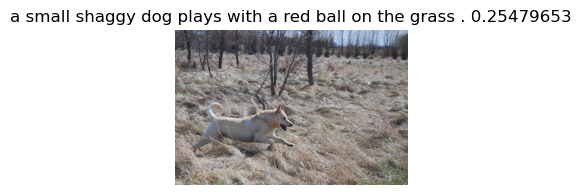

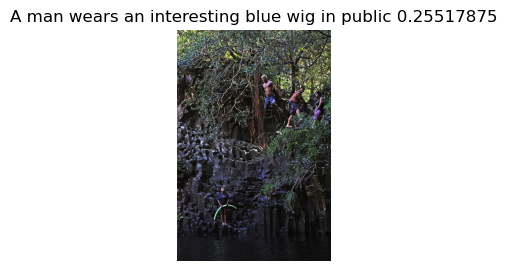

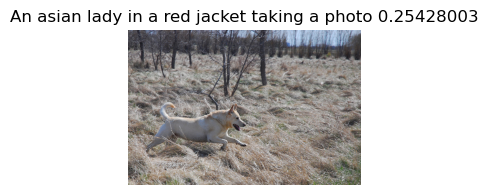

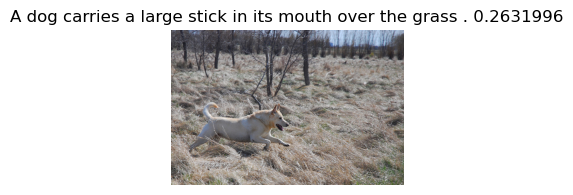

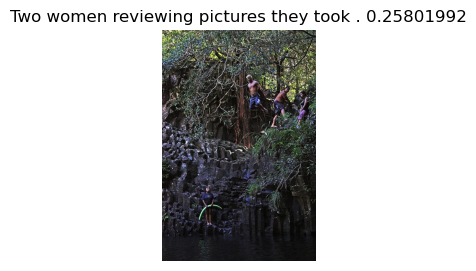

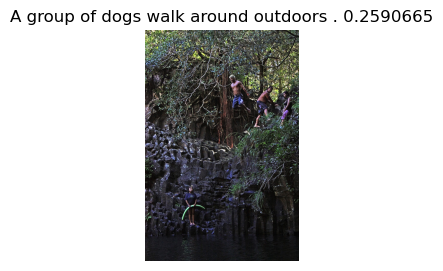

In [118]:
for item in ten_texts():
    get_image_from_text(item)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Ты в шаге от выпускного проекта. Поэтому давай уберем из проекта такое явное дублирование кода.  Этот раздел практически полностью совпадает с аналогичным для обучающих данных. Пожалуйста убери явные дубли (загрузка модели, определение трансформации и функции vectorize_image, а остальной код можно "завернуть" в функцию </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
У тебя всего 100 уникальных изображений. Зачем тебе 500 векторов изображений?</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Нельзя переобучать векторайзер на тестовых данных. И тем более непонятно, откуда здесь взялись биграммы, если их не было в обучающей выборке? </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В процессе тестирования ты показываешь просто шикарное качество угадывания картинок. Все изображения идеально соответствуют описаниям.
    
Но по опыту работы с этим проектом скажу тебе, что достигается это не потому, что модель такая хорошая, а потому что в тестовом датасете все изображения идеально подходят друг другу. А твой выбор ограничен только парами из тестового датасета.
    
Поэтому  я попрошу тебя немного переделать логику инференса.
    
Во первых, нужно заранее векторизовать 100 уникальных тестовых изображений.    
    
Далее нужно написать функцию, способную искать изображение по тексту для одного изображения. Функция должна уметь работать с любым текстовым описанием.

Что должна делаь функция
    
   - Получать текст
   - Возвращать картинку и метрику близости.
   - Выдавать дисклеймер если запрос некорректный
    
Под капотом функция должна векторизовать полученный текст, и с помощью модели получить предсказание для 100 пар (вектор описания + вектор изображения), где вектор описания мы получили только что, а 100 векторов изображений получили заранее.
    
И дальше ищем изображение, для которого модель покажет максимальную метрику.
    
    
    
---
    
 А затем нужно 10 раз применить функцию к 10 случайным запросам.
    
И не пугайся, если вдруг ты увидишь, что качества угадывания модели  близкое к рандомному угадыванию. К сожалению такое случается, но зато мы будем четко понимать, что функции для инференса работают корректно,  а вот модель "подкачала".    
    
.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Поправил 🙂

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
увы, нет.
    
пожалуйста внимательно прочитай что именно я прошу тебя сделать. 
    
  - инференс должен быть построен через функцию
  - функция должна принимать текст и возвращать изображение 
  - векторизция текста должна происходить внутри функции, соответственно функция должна работать с любым текстом описания
    
Сейчас ты по прежнему расставляешь оценки соответствия в тестовом датафрейме, изображения и описания в котором на 100% подходят друг другу.    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента V2</b></font>
   
Теперь вроде поправил 🙂

</div>

Результаты и выводы:

1. Проведена обширная работа по обработке данных, включая загрузку необходимых библиотек, извлечение и обработку изображений, их описаний, а также оценок экспертов и пользователей.

2. На основе предоставленных данных были извлечены дополнительные признаки, такие как общая оценка и классификация наличия запрещенного контента.

3. Изображения и тексты были успешно векторизованы для дальнейшего анализа.

4. Путем объединения векторов было получено 1512 новых признака.

5. Метрика RMSE была выбрана в качестве основной для оценки моделей.

6. Данные были разделены на тренировочную и тестовую выборки.

7. По результатам обучения нейронная сеть показала наилучшую метрику RMSE - 0.209 и была выбрана для проверки на тестовых данных.

8. В целом можно сделать вывод, что все выбранные инструменты и методы показали хорошие результаты. Модель достигла определенного уровня точности. Однако для более качественного результата при выборе изображений по запросу необходимы более качественные и обширные данные.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому.
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения.
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0).
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768).
    
***
    
А еще я видел удачный проект, где для векторизации изображений использовалось предсказание Resnet в котором не отключался последний слой. Получился вектор предсказаний верояятности что изображение принадлежит к каждому из 1000 классов Imagenet. И в сочетании с подходом "мешок слов" для текстов это может дать неплохой результа. Такая модель находит людей, собак, машины, снег и т.д.  
   
</div>

## 8. Выводы

- Jupyter Notebook открыт
- Весь код выполняется без ошибок
- Ячейки с кодом расположены в порядке исполнения
- Исследовательский анализ данных выполнен
- Проверены экспертные оценки и краудсорсинговые оценки
- Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- Изображения векторизованы
- Текстовые запросы векторизованы
- Данные корректно разбиты на тренировочную и тестовую выборки
- Предложена метрика качества работы модели
- Предложена модель схожести изображений и текстового запроса
- Модель обучена
- По итогам обучения модели сделаны выводы
- Проведено тестирование работы модели
- По итогам тестирования визуально сравнили качество поиска

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

С проектом ты справляешься, но еще нужно немало доработать.

Все критичные ошибки я подстветил красными комментариями, но если коротко, по этапам, то нужно доработать:
    
 - Исправить получение матрицы признаки-таргет. Возможно тебе будет проще, если ты будешь оперировать только экспертными оценками. Как ни странно, но в этом случае получаются неплохие результаты.
 - На мой взгляд стоит уделить больше внимания обучению нейронной сети. Сейчас она сделана "для галочки".
 - Ну и важно переделать логику тестировния. К сожалению сейчас она сделана с ошибкой
    
    
    
Желтые комментарии на твое усмотрение. Но если вдруг твой подход "не взлетит" (а такое часто бывает при использовании TF-IDF) и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>